In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\Satyasnigdha Pani\Dropbox\My PC (LAPTOP-PG46TMB0)\Desktop\Clg\Major\DataSet\train.csv')

In [4]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1476,FDK02,12.500,Low Fat,0.187841,Canned,119.2440,OUT010,1998,NaN,Tier 3,Grocery Store,119.8440
4275,FDJ10,5.095,Regular,0.130031,Snack Foods,142.4838,OUT018,2009,Medium,Tier 3,Supermarket Type2,561.9352
6692,FDV19,14.850,Regular,0.035312,Fruits and Vegetables,160.9578,OUT049,1999,Medium,Tier 1,Supermarket Type1,4813.7340
3263,FDT57,15.200,Low Fat,0.019142,Snack Foods,237.5248,OUT017,2007,NaN,Tier 2,Supermarket Type1,3318.3472
3315,FDU36,NaN,Low Fat,0.000000,Baking Goods,100.1384,OUT027,1985,Medium,Tier 3,Supermarket Type3,2956.1520


In [5]:
data.shape

(8523, 12)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Checking if there are any duplicate values in the data

In [9]:
data.duplicated().any()

False

### Handling the missing Values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

## Univariate Imputation
### For Item_Weight Column

In [12]:
# Mean and Median Imputation

In [13]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [14]:
print(mean_weight, median_weight)

12.857645184135976 12.6


In [15]:
# Not much difference between the two, so we can impute the data with either of them

In [16]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [17]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [18]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.56168825983637
Item Weight variance after mean imputation 17.860121735060453
Item Weight variance after median imputation 17.869561454073366


In [19]:
# As we can see after the mean and median imputation, the variance decreased

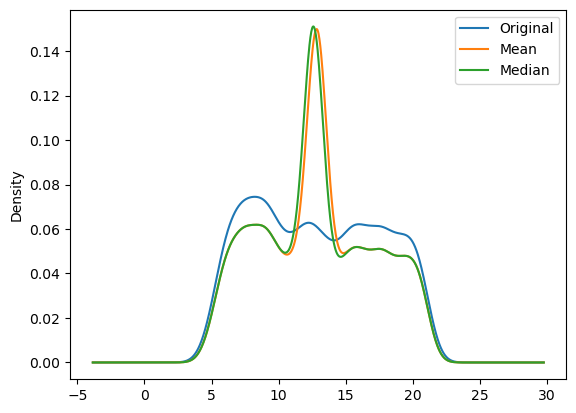

In [20]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

In [21]:
# The plot shows a drastic change in the distribution of the data as the newly added data are clustered around mean and median, this is not desired

<Axes: >

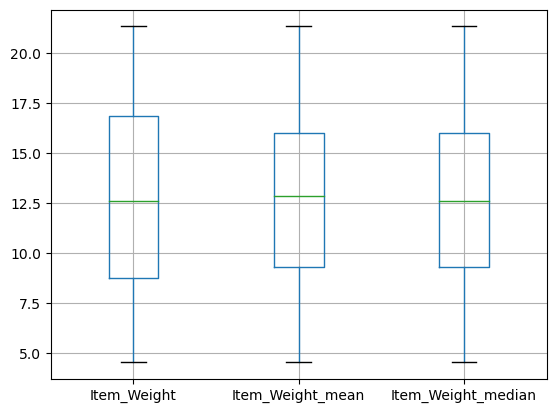

In [22]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [23]:
# This clearly shows a reduction in the spread of the data after mean and median imputation, hence we can go with another method

In [24]:
# Interpolation 

In [25]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

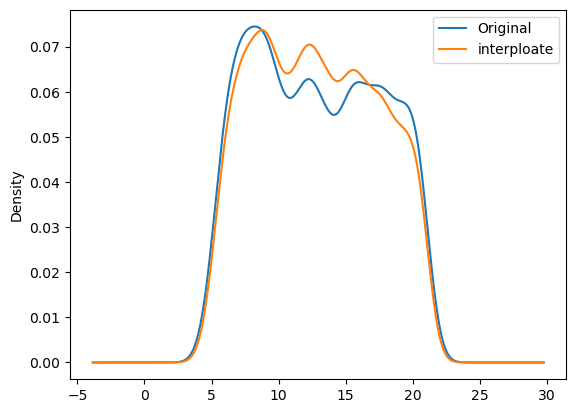

In [26]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()

In [27]:
# As we can see, the data distribution after Interpolation is similar to the original data, hence this is the choosen method

In [28]:
# Now, we will drop the extra columns

In [29]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)

In [30]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [31]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

### For Outlet_Size Column

In [32]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [33]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [34]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [35]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [36]:
missing_values = data['Outlet_Size'].isnull()

In [37]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [38]:
# Filling the missing values of Outlet_Size column using the most frequent values of Outlet_Type column

In [39]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [40]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

## Data Cleaning

### Item_Fat_Content

In [41]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [42]:
# Looking at the value counts, we can confirm that there are multiple names which are implying to the same category

In [43]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [44]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

### Item_Visibility

In [45]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [46]:
# There are 526 rows which contains 0's, hence we have to handle them as missing values 

In [47]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [48]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

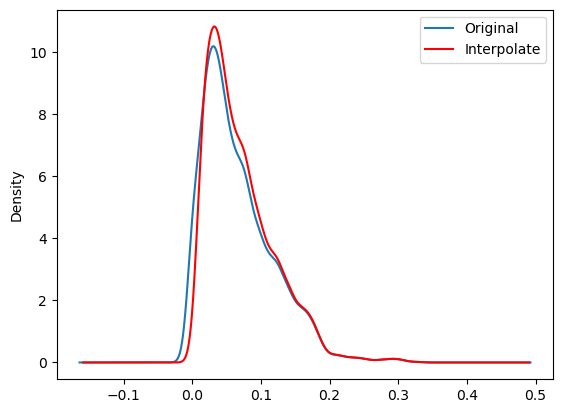

In [49]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [50]:
# It's clear that there is nearly no change in the distribution of the data

In [51]:
data = data.drop('Item_Visibility',axis=1)

In [52]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


### Item_identifier

In [53]:
data['Item_Identifier'].value_counts().sample(5)

Item_Identifier
FDW09    7
FDJ14    4
FDL51    6
FDB44    5
DRE03    7
Name: count, dtype: int64

In [54]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [55]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

### Outlet_Establishment_Year

In [56]:
import datetime as dt

In [57]:
current_year = dt.datetime.today().year

In [58]:
current_year

2024

In [59]:
# We can make a new column Outlet_Age depicting the age of the Outlet based on the Outlet_Establishment_Year

In [60]:
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']

In [61]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [62]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [63]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [64]:
# The Item_Identifier feature is not needed for our model, hence we can drop it

In [65]:
#data = data.drop('Item_Identifier',axis=1)

# Visualization

In [66]:
sns.set()

### Item_Weight distribution

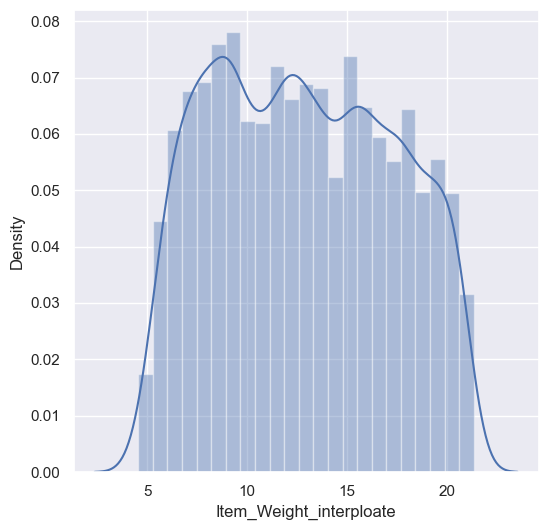

In [67]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight_interploate'])
plt.show()

### Item_Visibility distribution

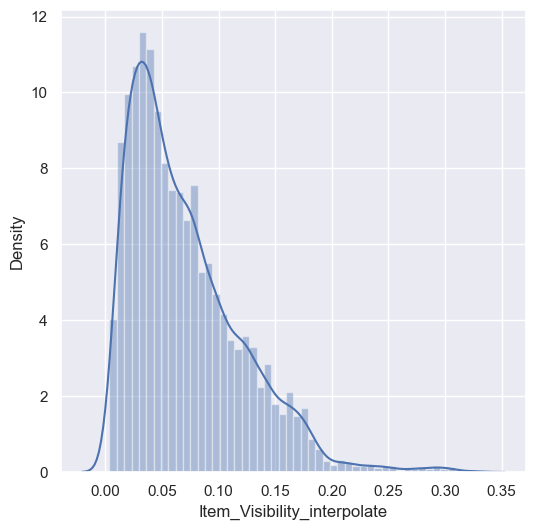

In [68]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility_interpolate'])
plt.show()

### Item_MRP distribution

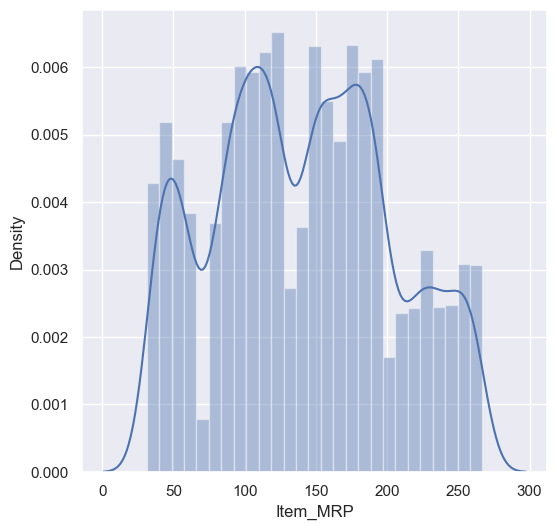

In [69]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

## Using Dtale Library

In [70]:
import dtale

In [71]:
dtale.show(data)

## Using klib library

In [72]:
import klib

GridSpec(6, 7)

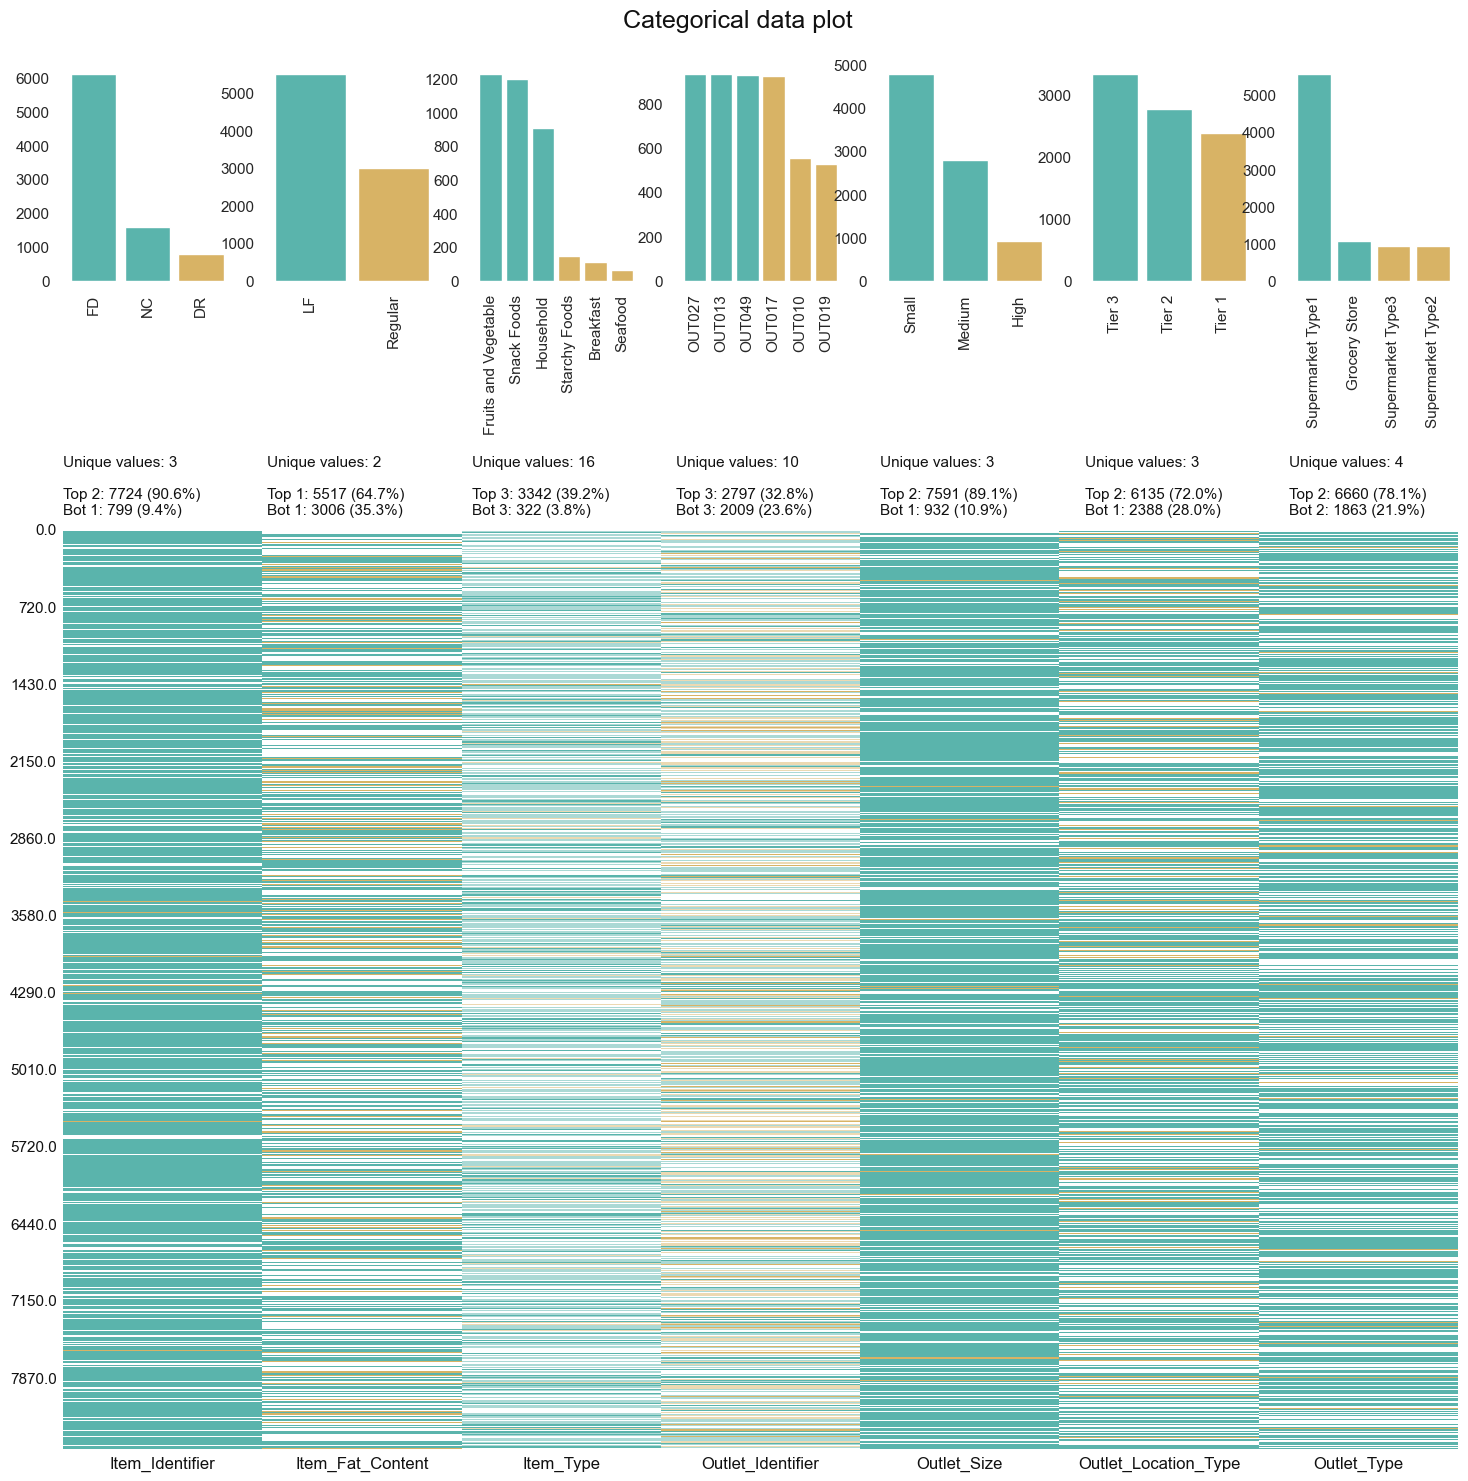

In [73]:
klib.cat_plot(data)

In [74]:
klib.corr_mat(data)

,Item_MRP,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
Item_MRP,1.00,0.57,0.02,-0.01,-0.01
Item_Outlet_Sales,0.57,1.00,0.01,-0.13,0.05
Item_Weight_interploate,0.02,0.01,1.00,-0.01,-0.00
Item_Visibility_interpolate,-0.01,-0.13,-0.01,1.00,0.08
Outlet_age,-0.01,0.05,-0.00,0.08,1.00


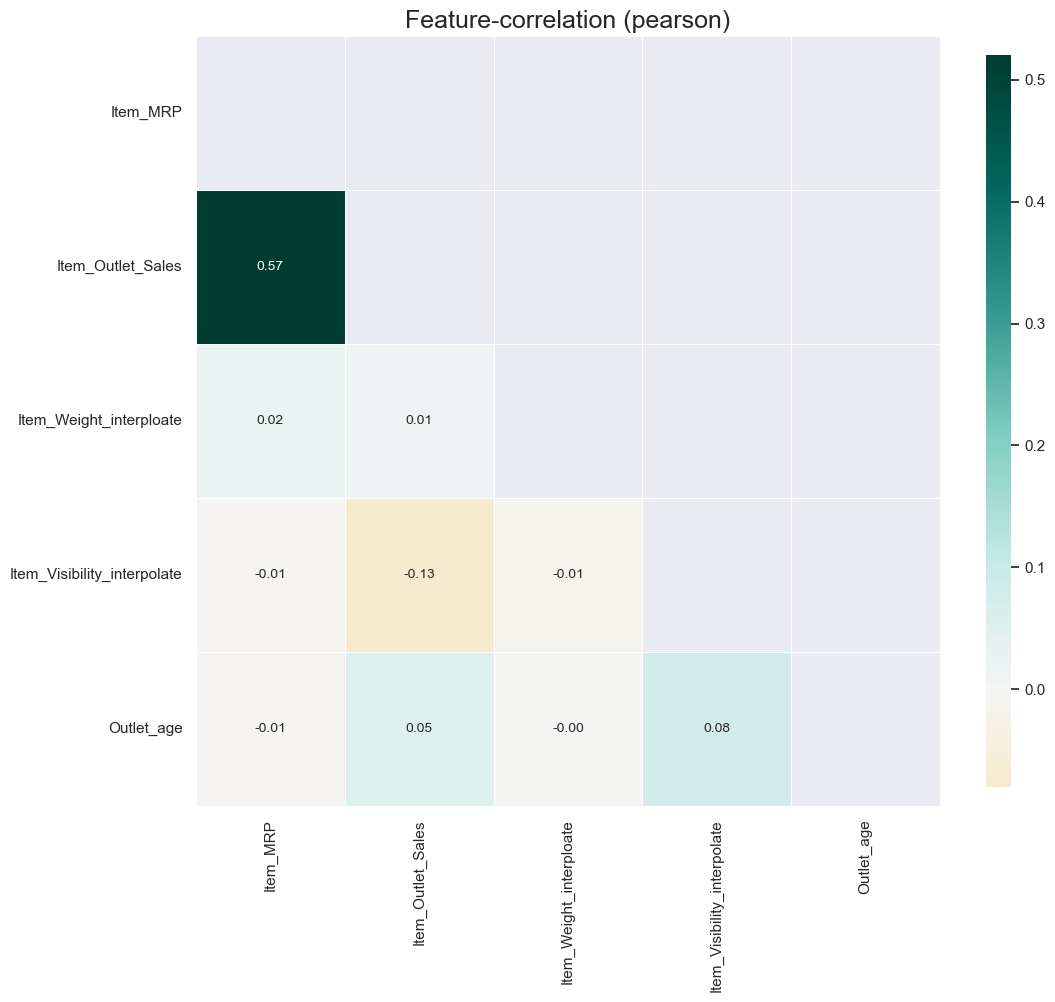

In [75]:
klib.corr_plot(data)
plt.grid(False)  # Turn off the grid
plt.show()

# Handling Categorical Columns

## Ordinal Encoding

In [76]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [77]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


In [78]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


## Choosing best Model

In [79]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
Y = data_encoded['Item_Outlet_Sales']

### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, X, Y, cv=5, scoring='r2')
scores.mean()

0.5015470931017388

### Decision Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X, Y, cv=5, scoring='r2')
scores.mean()

0.15587969178668684

### Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()
scores = cross_val_score(rf, X, Y, cv=5, scoring='r2')
scores.mean()

0.5525473273782195

In [83]:
# Since the r2_score for the Decision Tree Regressor is very low, we discard it and work with the other 2 regressors as our model

### Checking for important features

In [84]:
rf1 = rf.fit(X,Y)
pd.DataFrame({
    'feature':X.columns,
    'RF_importance':rf1.feature_importances_
    
}).sort_values(by='RF_importance',ascending=False)

,feature,RF_importance
3,Item_MRP,0.440852
7,Outlet_Type,0.239486
9,Item_Visibility_interpolate,0.107819
8,Item_Weight_interploate,0.072265
10,Outlet_age,0.053474
2,Item_Type,0.039180
4,Outlet_Identifier,0.016712
0,Item_Identifier,0.009912
1,Item_Fat_Content,0.008293
5,Outlet_Size,0.006234


In [85]:
scores = cross_val_score(rf1,X.drop(['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'], axis=1), Y, cv=5, scoring='r2')
print(scores.mean())

0.4551716384847131


In [86]:
X = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'], axis=1)

## Splitting our data into train and test

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 101, test_size = 0.2)

In [88]:
X_train

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
3684,54.6956,1.0,0.0,1.0,37
1935,94.6436,2.0,2.0,1.0,17
5142,167.0816,2.0,2.0,1.0,17
4978,177.4344,8.0,2.0,1.0,27
2299,110.8886,7.0,2.0,1.0,22
...,...,...,...,...,...
599,188.8530,8.0,2.0,1.0,27
5695,56.4614,7.0,2.0,1.0,22
8006,96.7384,8.0,2.0,1.0,27
1361,226.9404,2.0,2.0,1.0,17


In [89]:
X_test

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
8179,100.3358,3.0,1.0,2.0,15
8355,148.6418,1.0,0.0,1.0,37
3411,77.5986,8.0,2.0,1.0,27
7089,39.9506,2.0,2.0,1.0,17
6954,152.9340,7.0,2.0,1.0,22
...,...,...,...,...,...
1317,155.2630,9.0,1.0,1.0,25
4996,153.3682,8.0,2.0,1.0,27
531,184.7924,0.0,2.0,0.0,26
3891,114.6860,3.0,1.0,2.0,15


In [90]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [91]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

## Standardization

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [93]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Model Training

## Linear Regression

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(X_train, Y_train)

LinearRegression()

### On training data

In [96]:
Y_pred_lr = lr.predict(X_train)

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [98]:
print(r2_score(Y_train, Y_pred_lr))
print(mean_absolute_error(Y_train, Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_train, Y_pred_lr)))

0.501031060855019
912.8111622707369
1214.6406510499019


### On test data

In [99]:
Y_pred_lr = lr.predict(X_test)

In [100]:
print(r2_score(Y_test, Y_pred_lr))
print(mean_absolute_error(Y_test, Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_lr)))

0.4983845251658955
888.485091176323
1169.2241564381563


## Random Forest Regressor

In [101]:
rf = RandomForestRegressor()

In [102]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

### On training data

In [103]:
Y_pred_rf = rf.predict(X_train)

In [104]:
print(r2_score(Y_train, Y_pred_rf))
print(mean_absolute_error(Y_train, Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_train, Y_pred_rf)))

0.9171783542764659
336.21097569598976
494.86072150247077


### On test data

In [105]:
Y_pred_rf = rf.predict(X_test)

In [106]:
print(r2_score(Y_test, Y_pred_rf))
print(mean_absolute_error(Y_test, Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))

0.4829470219851826
831.4589606723599
1187.0795907756865


# Hyper Parameter Tuning

In [107]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

## Define Models and Parameters

### Linear Regression

In [108]:
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept = fit_intercepts)
linear_model = LinearRegression()

### Random Forest

In [109]:
estimators_space = [100, 1000]
max_depth = range(1, 7)
min_sample_splits = range(2, 6)
min_sample_leaves = range(2, 6)
param_grid_forest = dict(min_samples_split = min_sample_splits,
                       min_samples_leaf = min_sample_leaves ,
                       n_estimators = estimators_space, 
                       max_depth = max_depth)

forest_model = RandomForestRegressor()

In [110]:
cv = 5

In [111]:
models_to_test = ['LinearRegression','RandomForest']
regression_dict = dict(LinearRegression = linear_model,
                       RandomForest = forest_model)
param_grid_dict = dict(LinearRegression = param_grid_linear,
                       RandomForest = param_grid_forest)

In [112]:
score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {} 
r2_dict = {}
best_est_dict = {}

In [113]:
for model in models_to_test:
    regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv = cv, n_jobs = -1)
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)
    
    BOLD = "\033[1m"
    RESET = "\033[0m"
    
    # Print the tuned parameters and score
    print(BOLD + "=== Start report for {} regressor===".format(model) + RESET)
    score_dict[model] = regressor.best_score_
    print("Tuned Parameters: {}".format(regressor.best_params_)) 
    params_dict = regressor.best_params_
    print("Best score is {}".format(regressor.best_score_))
    
    # Compute metrics
    mae_dict[model] = mean_absolute_error(Y_test, Y_pred)
    print("MAE for {}".format(model))
    print(mean_absolute_error(Y_test, Y_pred))
    mse_dict[model] = mean_squared_error(Y_test, Y_pred)
    print("RMSE for {}".format(model))
    print(np.sqrt(mean_squared_error(Y_test, Y_pred)))
    r2_dict[model] = r2_score(Y_test, Y_pred)
    print("R2 score for {}".format(model))
    print(r2_score(Y_test, Y_pred))
    print(BOLD + "=== End of report for {} regressor=== \n".format(model) + RESET)
    
    # Add best estimator to the dict
    best_est_dict[model] = regressor.best_estimator_

=== Start report for LinearRegression regressor===
Tuned Parameters: {'fit_intercept': True}
Best score is 0.5003879146414512
MAE for LinearRegression
888.485091176323
RMSE for LinearRegression
1169.2241564381563
R2 score for LinearRegression
0.4983845251658955
=== End of report for LinearRegression regressor=== 

=== Start report for RandomForest regressor===
Tuned Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best score is 0.596181579795055
MAE for RandomForest
738.378715059229
RMSE for RandomForest
1042.9289601333585
R2 score for RandomForest
0.6008971569778407
=== End of report for RandomForest regressor=== 



### Summary Report

In [114]:
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

### Comparison 

<Axes: title={'center': 'Regressor Comparison'}, xlabel='Best Score', ylabel='Regressor'>

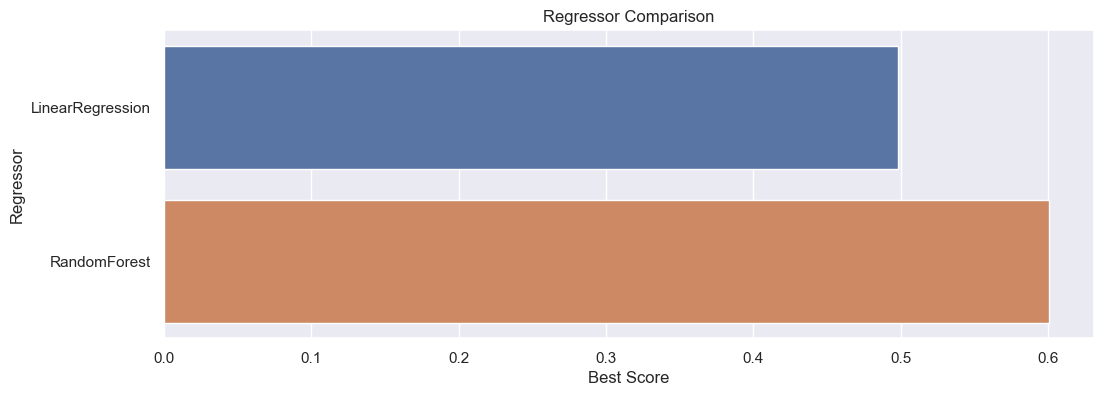

In [115]:
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary)

## Best Model

In [116]:
rf_final = RandomForestRegressor(max_depth =5, min_samples_leaf = 4, min_samples_split = 5, n_estimators = 100)

In [117]:
rf_final.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [118]:
Y_pred = rf_final.predict(X_test)

In [119]:
MAE = mean_absolute_error(Y_test, Y_pred)

In [120]:
print(MAE)

738.1000177319771


### Sample Prediction 

In [121]:
X_test.head()

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
8179,100.3358,3.0,1.0,2.0,15
8355,148.6418,1.0,0.0,1.0,37
3411,77.5986,8.0,2.0,1.0,27
7089,39.9506,2.0,2.0,1.0,17
6954,152.9340,7.0,2.0,1.0,22


In [123]:
BOLD = "\033[1m"
RESET = "\033[0m"

predicted_values = [
    rf_final.predict(np.array([[100.3358, 3.0, 1.0, 2.0, 15]]))[0],
    rf_final.predict(np.array([[148.6418, 1.0, 0.0, 1.0, 37]]))[0],
    rf_final.predict(np.array([[77.5986, 8.0, 2.0, 1.0, 7]]))[0],
    rf_final.predict(np.array([[39.9506, 2.0, 2.0, 1.0, 17]]))[0],
    rf_final.predict(np.array([[152.9340, 7.0, 2.0, 1.0, 22]]))[0]
]

actual_values = Y_test.head().values

print(BOLD + "Predicted Values:\tActual Values:\n" + RESET)
for predicted, actual in zip(predicted_values, actual_values):
    print(f"{predicted:.4f}\t\t{actual}")

Predicted Values:	Actual Values:

1555.8636		904.8222
2530.5114		2795.6942
1393.4095		1947.465
674.0956		872.8638
2545.2705		2450.144


# Saving Model

In [124]:
import joblib

In [125]:
joblib.dump(rf_final, r'C:\Users\Satyasnigdha Pani\Dropbox\My PC (LAPTOP-PG46TMB0)\Desktop\Clg\Major\Model\Model.sav')

['C:\\Users\\Satyasnigdha Pani\\Dropbox\\My PC (LAPTOP-PG46TMB0)\\Desktop\\Clg\\Major\\Model\\Model.sav']

In [126]:
model = joblib.load(r'C:\Users\Satyasnigdha Pani\Dropbox\My PC (LAPTOP-PG46TMB0)\Desktop\Clg\Major\Model\Model.sav')

In [128]:
model.predict(np.array([[148.6418, 1.0, 0.0, 1.0, 37]]))[0]

2530.511442032438

# GUI

In [2]:
import numpy as np
import datetime as dt
from tkinter import *
import joblib
current_year = dt.datetime.today().year
def show_entry_fields():
    p1=float(e1.get())
    #p4=float(e4.get())
    
    text = clicked.get()
    if text == "OUT010":
        p2=0
        print(p2)
    elif text=="OUT013":
        p2=1
        print(p2)
    elif text=="OUT017":
        p2=2
        print(p2)
    elif text=="OUT018":
        p2=3
        print(p2)
    elif text=="OUT019":
        p2=4
        print(p2)
    elif text=="OUT027":
        p2=5
        print(p2)
    elif text=="OUT035":
        p2=6
        print(p2)
    elif text=="OUT045":
        p2=7
        print(p2)
    elif text=="OUT046":
        p2=8
        print(p2)
    elif text=="OUT049":
        p2=9
        print(p2)
    text0 = clicked0.get()
    if text0 == "High":
        p3=0
        print(p3)
    elif text0=="Medium":
        p3=1
        print(p3)
    elif text0=="Small":
        p3=2
        print(p3)
        
    text1 = clicked1.get()
    if text1 == "Supermarket Type1":
        p4=1
        print(p4)
    elif text1=="Supermarket Type2":
        p4=2
        print(p4)
    elif text1=="Supermarket Type3":
        p4=3
        print(p4)
    elif text1=="Grocery Store":
        p4=0
        print(p4)
    
    p5=current_year - int(e5.get())
    print(p5)
    
    model = joblib.load(r'C:\Users\Satyasnigdha Pani\Dropbox\My PC (LAPTOP-PG46TMB0)\Desktop\Clg\Major\Model\Model.sav')
    result=model.predict(np.array([[p1,p2,p3,p4,p5]]))
    Label(master, text="Sales:").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Sales amount", result)
    
master = Tk()
master.title("Big Mart Sales Prediction using Machine Learning")


label = Label(master, text = " Big Mart Sales Prediction using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

# Item_MRP	Outlet_Identifier	Outlet_Size	Outlet_Type	Outlet_age
Label(master, text="Item_MRP").grid(row=1)
Label(master, text="Outlet_Identifier").grid(row=2)
Label(master, text="Outlet_Size").grid(row=3)
Label(master, text="Outlet_Type").grid(row=4)
Label(master, text="Outlet_Establishment_Year").grid(row=5)


clicked = StringVar()
options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049']

clicked0 = StringVar()

options0 = ['High', 'Medium', 'Small']

clicked1 = StringVar()
options1 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']

e1 = Entry(master)

e2 = OptionMenu(master , clicked , *options )
e2.configure(width=15)


e3 = OptionMenu(master , clicked0 , *options0 )
e3.configure(width=15)


e4 = OptionMenu(master , clicked1 , *options1 )
e4.configure(width=15)

e5 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

7
2
1
22
Sales amount [2545.27045315]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
